In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_excel('Data for identifying the drivers for sectoral WUI.xlsx')
plt.rcParams['figure.dpi'] = 60

In [128]:
#3.1
df

,Province,Year,PIRR,AIRR,WCI,IRR WUI,revised IRR WUI,Ratio of industrial water recycling,Ratio of industrial water evaporated,IND WUI,revised IND WUI
0,Anhui,1975,418.943076,29930.904227,0.019706,775.065446,775.065446,0.000000,0.306688,0.310811,0.310811
1,Anhui,1976,463.369634,18491.148830,0.020940,746.094373,717.345493,0.000000,0.290317,0.296136,0.289606
2,Anhui,1977,468.093808,21995.614134,0.022175,761.651117,737.127359,0.000000,0.273163,0.279693,0.265661
3,Anhui,1978,542.566592,14670.005881,0.023410,767.420515,798.875848,0.000000,0.315550,0.212044,0.194575
4,Anhui,1979,622.801535,19082.387416,0.024406,771.687823,828.967468,0.007621,0.243994,0.187960,0.168401
5,Anhui,1980,442.283199,24558.553760,0.025694,772.328081,805.825334,0.029787,0.268395,0.186694,0.161364
6,Anhui,1981,514.166045,18936.521926,0.027116,770.727524,848.370289,0.051952,0.245218,0.151795,0.124125
7,Anhui,1982,484.141343,24520.929043,0.028605,770.610234,865.906829,0.074118,0.186361,0.139954,0.111741
8,Anhui,1983,515.032473,28502.246768,0.029525,763.106834,864.673887,0.094618,0.200634,0.129950,0.101491
9,Anhui,1984,539.189414,26915.205421,0.030897,787.900081,871.947653,0.118272,0.199282,0.113588,0.090604


In [129]:
#3.2

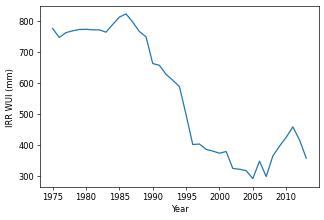

In [130]:
df1 = df.groupby(['Year']).sum()['IRR WUI'].plot(ylabel = 'IRR WUI (mm) ')

In [116]:
#3.3

In [117]:
#mean value
meam_WUI_prov = df.mean()['IRR WUI']
print('The mean value of IRR WUI is: ',meam_WUI_prov)

The mean value of IRR WUI is:  561.2856105764963


In [118]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df['IRR WUI'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.842, p=0.000
Probably not Gaussian


In [119]:
#Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df['IRR WUI'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.000, p=1.000
Probably independent


In [120]:
#Augmented Dickey-Fuller Unit Root Test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(df['IRR WUI'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=-0.610, p=0.869
Probably not Stationary


In [121]:
#D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(df['IRR WUI'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=81.608, p=0.000
Probably not Gaussian
